Nama : Aditya Atadewa  
Kelas : TI 3G  
NIM : 2341720174  
Absen : 01  

# Tugas Praktikum: Multiple Linear Regression

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 1. Identifikasi Variabel Bebas & Variabel Target

In [2]:
file_path = '/content/drive/My Drive/Machine Learning - 2025/Jobsheet-07/dataset/insurance.csv'

# Load dataset
df = pd.read_csv(file_path)

# Variabel bebas (fitur)
X = df.drop("charges", axis=1)

# Variabel target
y = df["charges"]

print("Fitur (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())


Fitur (X):


age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest


Target (y):


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## 2. Membagi Dataset Menjadi Data Latih & Data Uji

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (1070, 6)
Ukuran data uji: (268, 6)


## 3. Feature Encoding + Feature Scaling

In [4]:
# Kolom kategorikal yang perlu encoding
categorical_cols = ['sex', 'smoker', 'region']

# One-Hot Encoding
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)

# Terapkan encoding
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


## 4. Membuat Model Multiple Linear Regression

In [5]:
model = LinearRegression()

## 5. Melatih Model & Melakukan Prediksi

In [6]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

## 6. Evaluasi Model (R², MSE, MAE)

In [7]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("=== Evaluasi Model Regresi Linier Berganda ===")
print(f"R-squared : {r2:.4f}")
print(f"MSE       : {mse:.2f}")
print(f"MAE       : {mae:.2f}")


=== Evaluasi Model Regresi Linier Berganda ===
R-squared : 0.7836
MSE       : 33596915.85
MAE       : 4181.19


## Visualisasi Actual vs Predicted

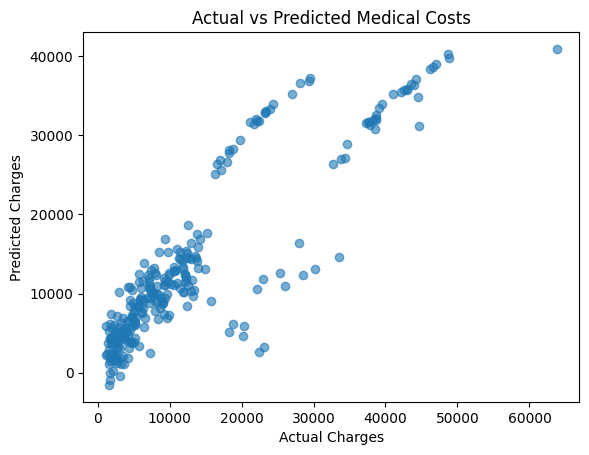

In [8]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Costs")
plt.show()